In [1]:
import cv2
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.models import Sequential 
from keras.layers.core import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.compat.v1 import keras

config = ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement=True

keras.backend.set_session(InteractiveSession(config=config))
session = InteractiveSession(config=config)

/home/shinfu/anaconda3/envs/cv_hw/lib/python3.7/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


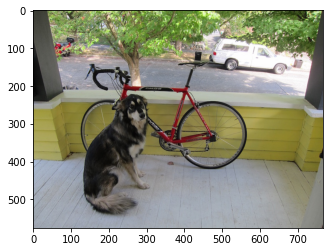

In [2]:
image=cv2.imread('data/dog_bicycle.jpg')
#ax.imshow(image)

def show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # plt.imshow 預設圖片是 rgb 的
    plt.show()
show(image)

In [3]:
model=Sequential()
model.add(Conv2D(3, (1,1),
          padding="same",
          data_format='channels_last',
          activation='relu',
          input_shape=image.shape))
model.add(Conv2D(4, (3,3),
          padding="same",
          data_format='channels_last',
          activation='relu',
          input_shape=image.shape))
print(model.summary())
#權重都是亂數值

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 576, 768, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 576, 768, 4)       112       
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
# keras在讀取檔案時是以 batch 的方式一次讀取多張，
#但我們這裡只需要判讀一張，所以透過 expand_dims() 函式來多擴張一個維度
image_batch=np.expand_dims(image,axis=0)
print(image_batch.shape)

(1, 576, 768, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(576, 768, 4)


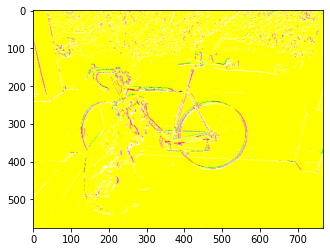

In [5]:
# model.predict()回傳feature map
image_conv=model.predict(image_batch)
# np.squeeze, 把shape中為1的维度去掉
img=np.squeeze(image_conv,axis=0)
print(img.shape)
plt.imshow(img)